In [461]:
import numpy as np
from fractions import *

from time import perf_counter, time

import sys

sys.path.insert(1, "/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/monodromy")

import monodromy

from monodromy.coordinates import monodromy_alcove, monodromy_alcove_c2, monodromy_to_positive_canonical_polytope, rho_reflect
from monodromy.elimination import cylinderize, project
from monodromy.polytopes import *
from monodromy.static import qlr_polytope
from monodromy.method import *

from itertools import count

import os

import matplotlib.pyplot as plt

from scipy import stats

from functools import reduce
from itertools import combinations

### a. Figure out how projection works

Note that you can only project one coordinate at time, so always start with the highest coordinate first and work your way down so you don't accidentally change the position of the coordinate you want to project.

In [94]:
# Triangular Prism 
triangular_prism = Polytope(convex_subpolytopes=[
    ConvexPolytope(inequalities=[[0, 1, 2, 0], [0, 1, 0, 0], [1, -1, 0, 0], [0, 0, -1, 0], [-1, 1, 0, 1], [2, 1, 0, -2]],
                   name="triangular prism")
]).reduce()

In [95]:
print(project(triangular_prism, 1).reduce())

[
# triangular prism: 
    0 +    -1 x1 +     0 x2 >= 0
    0 +     0 x1 +     1 x2 >= 0
    3 +     0 x1 +    -2 x2 >= 0
    1 +     2 x1 +     0 x2 >= 0

]


#### Project High Dimensional Polytope to Weyl Tetrahedron

In [140]:
file = open("/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/inequalities/massive.txt", "r")

polytope_dict = eval(file.read()[63:])

In [160]:
polytope_list = compute_polytope(4, 1/5)

Working on an XY interaction sequence of length 0...
Working on the reduction 1/3... done.  Took 0.11355518642812967 seconds.
Working on the reduction 2/3... done.  Took 0.11050555622205138 seconds.
Working on the reduction 3/3... done.  Took 0.12132201716303825 seconds.
The first three coordinates are the canonical coordinates CAN(x1, x2, x3).
The remaining coordinates x4, ..., xk are the XY interaction strengths.
[
# origin ∩ anonymous_convex_polytope_112: 
    1 +     0 x1 +     0 x2 +     0 x3 >= 0
    0 +     1 x1 +     0 x2 +     0 x3 == 0
    0 +     0 x1 +     1 x2 +     0 x3 == 0
    0 +     0 x1 +     0 x2 +     1 x3 == 0
,
# origin ∩ anonymous_convex_polytope_113: 
    1 +     0 x1 +     0 x2 +     0 x3 >= 0
   -1 +     1 x1 +     0 x2 +     0 x3 == 0
    0 +     0 x1 +     1 x2 +     0 x3 == 0
    0 +     0 x1 +     0 x2 +     1 x3 == 0

]
Working on an XY interaction sequence of length 1...
Working on the reduction 1/3... done.  Took 0.2559748198837042 seconds.
Working on 

Working on the reduction 1/3... done.  Took 1453.5170999336988 seconds.
Working on the reduction 2/3... done.  Took 313.7537888060324 seconds.
Working on the reduction 3/3... done.  Took 6.284044974017888 seconds.
The first three coordinates are the canonical coordinates CAN(x1, x2, x3).
The remaining coordinates x4, ..., xk are the XY interaction strengths.
[
# origin ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_112: 
    1 +     0 x1 +     0 x2 +     0 x3 +    -5 x4 +     0 x5 +     0 x6 +     0 x7 >= 0
    0 +     0 x1 +     0 x2 +     0 x3 +     0 x4 +     0 x5 +     0 x6 +     1 x7 >= 0
    0 +     1 x1 +    -1 x2 +    -1 x3 +     0 x4 +     0 x5 +     2 x6 +     2 x7 >= 0
    0 +     0 x1 +     0 x2 +     0 x3 +     0 x4 +     0 x5 +     1 x6 +     0 x7 >= 0
    0 +     1 x1 +     1 x2 +    -1 x3 +     2 x4 +    -2 x5 +     2 x6 +     2 x7 >= 0
    0 +     0 x1 +     1 x

In [165]:
### Unpack n=3 pi/6 polytope
#polytope = polytope_dict[Fraction(1, 4)][3]
polytope = polytope_list[2]

In [166]:
#reduced_polytope = project(project(project(project(polytope, 7).reduce(), 6).reduce(), 5).reduce(), 4).reduce()
reduced_polytope = project(project(polytope, 5).reduce(), 4).reduce()
reduced_polytope.name = "reduced_polytope"

In [167]:
print(reduced_polytope)

[
# origin ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_112: 
    2 +    -5 x1 +     0 x2 +     0 x3 >= 0
    0 +     0 x1 +     1 x2 +    -1 x3 >= 0
    0 +     1 x1 +    -1 x2 +    -1 x3 >= 0
    0 +     0 x1 +     0 x2 +     1 x3 >= 0
,
# origin ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_112 ∩ anonymous_convex_polytope_113: 
   -3 +     5 x1 +     0 x2 +     0 x3 >= 0
    0 +     0 x1 +     1 x2 +    -1 x3 >= 0
    1 +    -1 x1 +    -1 x2 +    -1 x3 >= 0
    0 +     0 x1 +     0 x2 +     1 x3 >= 0

]


### Calculate infinitesimal difference

In [151]:
polytope_list = compute_polytope(4, 1/3)

Working on an XY interaction sequence of length 0...
Working on the reduction 1/3... done.  Took 0.13473604898899794 seconds.
Working on the reduction 2/3... done.  Took 0.12841775617562234 seconds.
Working on the reduction 3/3... done.  Took 0.11057388386689126 seconds.
The first three coordinates are the canonical coordinates CAN(x1, x2, x3).
The remaining coordinates x4, ..., xk are the XY interaction strengths.
[
# origin ∩ anonymous_convex_polytope_96: 
    1 +     0 x1 +     0 x2 +     0 x3 >= 0
    0 +     1 x1 +     0 x2 +     0 x3 == 0
    0 +     0 x1 +     1 x2 +     0 x3 == 0
    0 +     0 x1 +     0 x2 +     1 x3 == 0
,
# origin ∩ anonymous_convex_polytope_97: 
    1 +     0 x1 +     0 x2 +     0 x3 >= 0
   -1 +     1 x1 +     0 x2 +     0 x3 == 0
    0 +     0 x1 +     1 x2 +     0 x3 == 0
    0 +     0 x1 +     0 x2 +     1 x3 == 0

]
Working on an XY interaction sequence of length 1...
Working on the reduction 1/3... done.  Took 0.24852311611175537 seconds.
Working on t

Working on the reduction 1/3... done.  Took 4178.79631907586 seconds.
Working on the reduction 2/3... done.  Took 729.1953250900842 seconds.
Working on the reduction 3/3... done.  Took 21.90655285306275 seconds.
The first three coordinates are the canonical coordinates CAN(x1, x2, x3).
The remaining coordinates x4, ..., xk are the XY interaction strengths.
[
# origin ∩ anonymous_convex_polytope_96 ∩ anonymous_convex_polytope_96 ∩ anonymous_convex_polytope_96 ∩ anonymous_convex_polytope_96 ∩ anonymous_convex_polytope_96: 
    0 +     1 x1 +     1 x2 +    -1 x3 +     2 x4 +    -2 x5 +     2 x6 +     2 x7 >= 0
    0 +     0 x1 +     1 x2 +     0 x3 +     1 x4 +    -1 x5 +     1 x6 +     1 x7 >= 0
    0 +    -1 x1 +     1 x2 +    -1 x3 +     2 x4 +     0 x5 +     2 x6 +     2 x7 >= 0
    1 +     0 x1 +     0 x2 +     0 x3 +     0 x4 +    -3 x5 +     0 x6 +     0 x7 >= 0
    0 +     1 x1 +    -1 x2 +    -1 x3 +     2 x4 +     0 x5 +     0 x6 +     2 x7 >= 0
    0 +    -1 x1 +     1 x2 +    

In [152]:
len(polytope_list[4].convex_subpolytopes)

2

In [141]:
### 1/3 + 1e-4
polytope = polytope_dict[Fraction(222223,666667)]

In [142]:
p0, p1, p2, p3 = polytope[3].convex_subpolytopes

In [143]:
print(f"p0 Volume: {p0.volume.volume.limit_denominator()}")
print(f"p1 Volume: {p1.volume.volume.limit_denominator()}")
print(f"p2 Volume: {p2.volume.volume.limit_denominator()}")
print(f"p3 Volume: {p3.volume.volume.limit_denominator()}")

p0 Volume: 580/940607
p1 Volume: 580/940607
p2 Volume: 229/465499
p3 Volume: 229/465499


### Computing the ratio between the volume of p3 and p0

In [144]:
volume_dict = dict()
for angle in sorted(polytope_dict.keys()):
    if len(polytope_dict[angle][3].convex_subpolytopes) ==4:
        p0 = polytope_dict[angle][3].convex_subpolytopes[0]
        p1 = polytope_dict[angle][3].convex_subpolytopes[1]
        p2 = polytope_dict[angle][3].convex_subpolytopes[2]
        p3 = polytope_dict[angle][3].convex_subpolytopes[3]
        
        ratio1 = p3.volume.volume / p0.volume.volume
        ratio2 = p2.volume.volume / p1.volume.volume
        
        assert ratio1 == ratio2, f"{angle} is kinda weird"
        
        volume_dict[angle] = float(ratio1)

In [145]:
volume_dict

{Fraction(222223, 666667): 0.797805347150731,
 Fraction(10003, 30000): 0.797842270799506,
 Fraction(17, 48): 0.8056135309660591,
 Fraction(3, 8): 0.8132613111809357,
 Fraction(19, 48): 0.8205367775338661,
 Fraction(5, 12): 0.827403782954113,
 Fraction(7, 16): 0.8339552111623237,
 Fraction(11, 24): 0.8403588065096621,
 Fraction(23, 48): 0.8468302384550835,
 Fraction(1, 2): 0.8536271020007364}

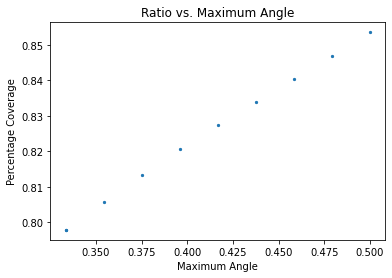

In [149]:
x = list(volume_dict.keys())
y = np.array([volume_dict[angle] for angle in x])
x = np.array([float(elem) for elem in x])

fig, ax = plt.subplots()

ax.set_title("Ratio vs. Maximum Angle")
ax.set_xlabel("Maximum Angle")
ax.set_ylabel("Percentage Coverage")
ax.set_yscale('linear')
ax.scatter(x, y, s = 5)

Slope: 0.3343178920139052
Intercept: 0.6872069220215978
R-squared: 0.9986746611752839


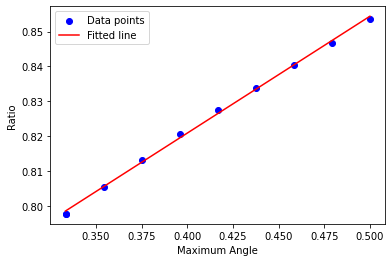

In [150]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Plot the data and the regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, slope*x + intercept, color='red', label='Fitted line')
plt.xlabel('Maximum Angle')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### Problem 4 (cont.)

Continuing with problem 4, today we explore a new method to check whether any extremal vertices of $\frac{\pi}{6}$ actually touch the side of the high dimensional polytope. First, we isolate the vertices of the $\frac{\pi}{6}$. Then we check if these vertices satisfy the equality constraints of the grand-polytope. This means just checking dot product.

In [469]:
positive_canonical_alcove = make_convex_polytope([
    [1, -1,  0,  0],  # 1  >= c1
    [0,  1, -1,  0],  # c1 >= c2
    [0,  0,  1, -1],  # c2 >= c3
    [1, -1, -1,  0],  # 1 - c1 >= c2,  # c3 >= 0
], name="A_SU(4)^can")
"""
Inequalities defining the standard choice of fundamental Weyl alcove in
normalized positive canonical coordinates for SU(4).

cf. Eqn 6 of Entropy.
"""


positive_canonical_alcove_c2 = make_convex_polytope([
    *positive_canonical_alcove.convex_subpolytopes[0].inequalities,
    [0, 0, 0, 1],  # c3 >=  0, the C2 inequality
], name="A_PU(4)^can")

In [420]:
positive_canonical_alcove_c2

Polytope(convex_subpolytopes=[ConvexPolytope(inequalities=[[1, -1, 0, 0], [0, 1, -1, 0], [0, 0, 1, -1], [1, -1, -1, 0], [0, 0, 0, 1]], equalities=[], name='A_PU(4)^can')])

In [421]:
grand_polytope = ConvexPolytope(inequalities=[
    [1, -1, 0, 0, 0, 0, 0],
    [0, 1, -1, 0, 0, 0, 0],
    [0, 0, 1, -1, 0, 0, 0],
    [1, -1, -1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, -2, 0, 0],
    [1, 0, 0, 0, 0, -2, 0],
    [1, 0, 0, 0, 0, 0, -2],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
], name='grand_polytope')

grand_polytope_faces = make_face(grand_polytope)